1.EDA
A continuacion analizaremos la base de datos de Internet que nos proporciono la empresa de telecomunicaciones. 
En esta realizaremos una limpieza general, para posteriormente poder realizar un analisis a profundidad acompañado de graficos que representen los insights y la informacion de valor extraida. 

Primero importaremos las libreriras necesarias: 

In [3]:
#importacion de librerias 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

Una vez la informacion cargada, revisaremos el contenido de las hojas de excel y decidiremos que columnas nos quedamos y cuales eliminamos, centrandonos en las que presenten datos de utilidad para el analisis. 

In [6]:
# Se revisa la lista de los nombres de las hojas y contenido
arc = r"documentos excel\Internet (1).xlsx"
internet = pd.ExcelFile(arc)
sheet = internet.sheet_names

sheet

['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por rango',
 'Accesos por rangos',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

Ya seleccionadas las columnas que dejaremos, crearemos un diccionario de df para poder accesar a la informacion que iremos necesitando. 

In [113]:
#Se crea una lista con las hojas de interes del archivo Internet para crear un diccionario de DF con las mismas y poder trabajar solo con la informacion necesaria. 
ruta_archivo = r'documentos excel\Internet (1).xlsx'  
hojas_deseadas = [ 'Accesos Por Tecnología', 'Velocidad_sin_Rangos', 'Velocidad % por prov', 'Totales Accesos Por Tecnología', 'Penetracion-totales', 'Totales Accesos por rango', 
                  'Totales Dial-BAf', 'Ingresos ']  

df_dict = pd.read_excel(ruta_archivo, sheet_name=hojas_deseadas)
for nombre_hoja, df in df_dict.items():
    print(f"Hoja: {nombre_hoja}")
    print(df.head(), "\n")

Hoja: Accesos Por Tecnología
    Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024         2  Capital Federal   54102.0   1144781.0      230402.0   
2  2024         2        Catamarca    4951.0     10303.0       58355.0   
3  2024         2            Chaco    9448.0     57935.0       68944.0   
4  2024         2           Chubut   25955.0     80704.0       26516.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  
2    1384.0     81.0    75074.0  
3    8407.0   2358.0   147092.0  
4   31118.0   9930.0   174223.0   

Hoja: Velocidad_sin_Rangos
    Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS A

EDA 1. Empezaremos con la busqueda de valores faltantes, mediante un ciclo "for" que recorra todas las hojas cargadas en el diccionario de df que nos sume cuantos faltantes hay en cada columna y nos lo separe por nombre de hoja. 

In [114]:
#Suma los valores faltantes por columna: 
for nombre_hoja, df in df_dict.items():
    print(f"Valores faltantes en la hoja: {nombre_hoja}")
    faltantes = df.isnull().sum()  
    print(faltantes)  
    print()

Valores faltantes en la hoja: Accesos Por Tecnología
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

Valores faltantes en la hoja: Velocidad_sin_Rangos
Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64

Valores faltantes en la hoja: Velocidad % por prov
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Valores faltantes en la hoja: Totales Accesos Por Tecnología
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

Valores faltantes en la hoja: Penetracion-totales
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                   

Se observan valores faltantes en las columnas: Velocidad sin rangos y accesos por tecnologia. Los cuales se deciden igualar a 0 ya que el numero de nulos en comparacion a la densidad de registros es minima y poco relevante para el analisis. 

In [13]:
# Se utiliza un ciclo for para iterar sobre cada hoja y reemplazar valores faltantes con 0 en todas las hojas
for nombre_hoja, df in df_dict.items():
    df_dict[nombre_hoja] = df.fillna(0) 

#Se verifica que hayan quedado en 0. 
for nombre_hoja, df in df_dict.items():
    print(f"Valores faltantes en la hoja: {nombre_hoja}")
    faltantes = df.isnull().sum()  
    print(faltantes)  
    print()

Valores faltantes en la hoja: Accesos Por Tecnología
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Valores faltantes en la hoja: Velocidad_sin_Rangos
Año          0
Trimestre    0
Provincia    0
Velocidad    0
Accesos      0
dtype: int64

Valores faltantes en la hoja: Velocidad % por prov
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Valores faltantes en la hoja: Totales VMD
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

Valores faltantes en la hoja: Totales Accesos Por Tecnología
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

Valores faltantes en la hoja: Penetracion-totales

EDA 2. Ahora realizaremos una busqueda de duplicados, por medio de un ciclo "for" que verificara en cada hoja del diccionario devolviendo el total de filas duplicadas por hoja. 

In [14]:
# Verificar duplicados en todas las hojas
for nombre_hoja, df in df_dict.items():
    print(f"Verificando duplicados en la hoja: {nombre_hoja}")
    duplicados = df.duplicated()  # Devuelve una Serie booleana indicando filas duplicadas
    num_duplicados = duplicados.sum()  # Cuenta las filas duplicadas
    print(f"Filas duplicadas: {num_duplicados}")
    if num_duplicados > 0:
        print(f"Filas duplicadas en la hoja {nombre_hoja}:")
        print(df[duplicados])  # Muestra las filas duplicadas
    print()

Verificando duplicados en la hoja: Accesos Por Tecnología
Filas duplicadas: 0

Verificando duplicados en la hoja: Velocidad_sin_Rangos
Filas duplicadas: 0

Verificando duplicados en la hoja: Velocidad % por prov
Filas duplicadas: 0

Verificando duplicados en la hoja: Totales VMD
Filas duplicadas: 0

Verificando duplicados en la hoja: Totales Accesos Por Tecnología
Filas duplicadas: 0

Verificando duplicados en la hoja: Penetracion-totales
Filas duplicadas: 0

Verificando duplicados en la hoja: Totales Accesos por rango
Filas duplicadas: 0

Verificando duplicados en la hoja: Totales Dial-BAf
Filas duplicadas: 0

Verificando duplicados en la hoja: Ingresos 
Filas duplicadas: 0



Como no se observan duplicados, no hay necesidad de imputarlos. 
EDA 3. Valores atipicos/extremos, OUTLIERS. Primeramente se utiliza el Rango intercuartílico (IQR), que es un metodo estadistico univariado. 

In [15]:
# Función para contar outliers por IQR
def contar_outliers_iqr(df):
    outliers_count = {}
    for columna in df.select_dtypes(include=['number']).columns:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Contar filas con valores atípicos en la columna
        outliers_count[columna] = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)].shape[0]
    return outliers_count

Una vez definida la funcion para contar outliers por IQR, se itera en cada hoja 

In [16]:
# Contar outliers en todas las hojas
for nombre_hoja, df in df_dict.items():
    print(f"\nProcesando hoja: {nombre_hoja}")
    outliers_count_dict = contar_outliers_iqr(df)
    
    # Mostrar conteo de outliers por columna
    for columna, count in outliers_count_dict.items():
        print(f"Columna '{columna}': {count} outliers")


Procesando hoja: Accesos Por Tecnología
Columna 'ADSL': 132 outliers
Columna 'Cablemodem': 166 outliers
Columna 'Fibra óptica': 105 outliers
Columna 'Wireless': 87 outliers
Columna 'Otros': 112 outliers
Columna 'Total': 167 outliers

Procesando hoja: Velocidad_sin_Rangos
Columna 'Año': 0 outliers
Columna 'Trimestre': 0 outliers
Columna 'Velocidad': 2800 outliers
Columna 'Accesos': 2600 outliers

Procesando hoja: Velocidad % por prov
Columna 'Año': 0 outliers
Columna 'Trimestre': 0 outliers
Columna 'Mbps (Media de bajada)': 111 outliers

Procesando hoja: Totales VMD
Columna 'Año': 0 outliers
Columna 'Trimestre': 0 outliers
Columna 'Mbps (Media de bajada)': 5 outliers

Procesando hoja: Totales Accesos Por Tecnología
Columna 'Año': 0 outliers
Columna 'Trimestre': 0 outliers
Columna 'ADSL': 0 outliers
Columna 'Cablemodem': 0 outliers
Columna 'Fibra óptica': 0 outliers
Columna 'Wireless': 0 outliers
Columna 'Otros': 0 outliers
Columna 'Total': 0 outliers

Procesando hoja: Penetracion-total

In [370]:
#Se guardan los resultados en un df para procesarlos en caso de ser necesario.  
resultados = []
for nombre_hoja, df in df_dict.items():
    outliers_count_dict = contar_outliers_iqr(df)
    for columna, count in outliers_count_dict.items():
        resultados.append({'Hoja': nombre_hoja, 'Columna': columna, 'Outliers': count})

resultados_df = pd.DataFrame(resultados)  # La lista de diccionarios "resultados" se convierte en un df para analizarlo posteriormente como una tabla

Para poder visualizar los valores atipicos realizaremos una funcion que genere Boxplots de outliers por cada hoja.

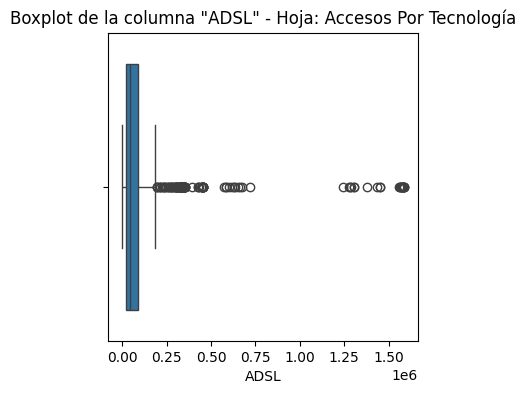

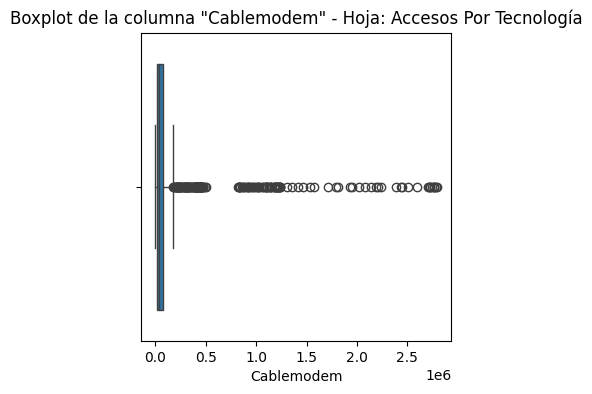

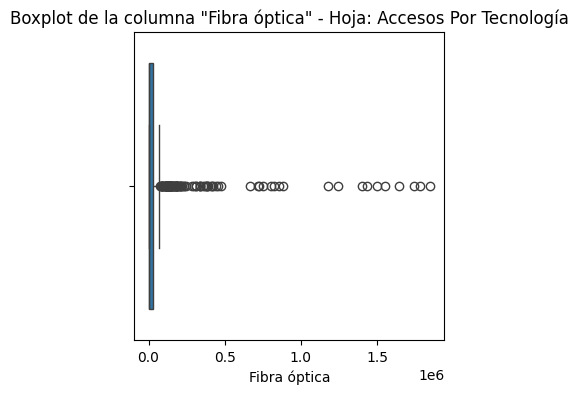

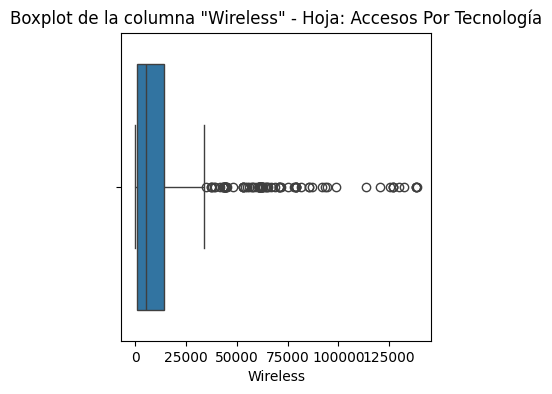

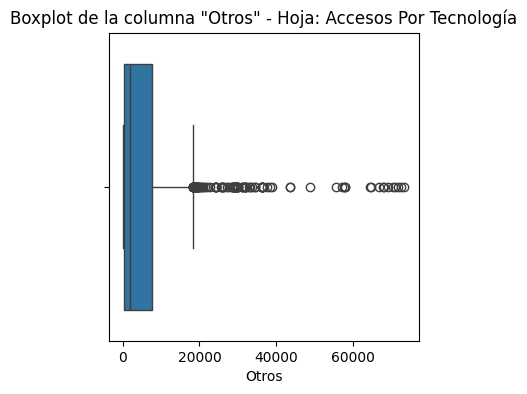

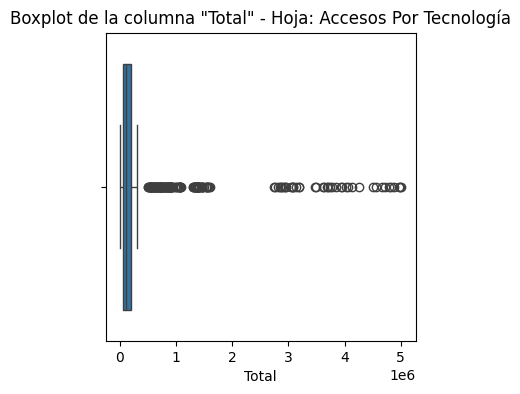

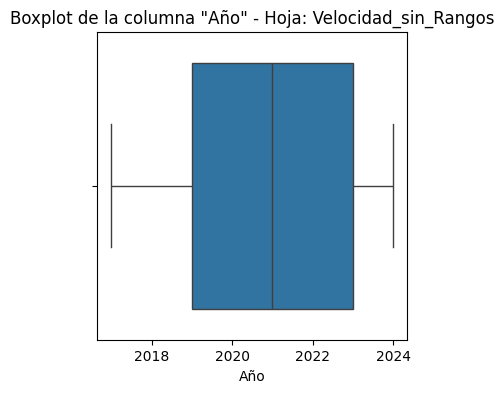

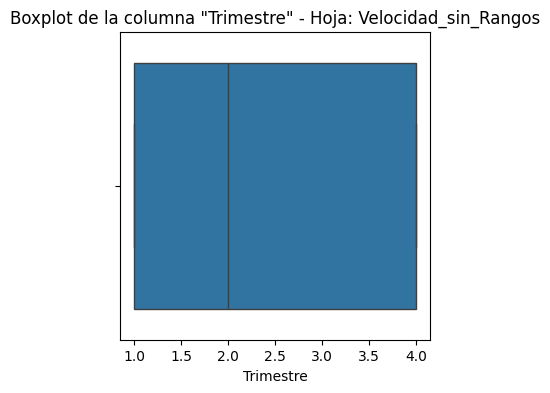

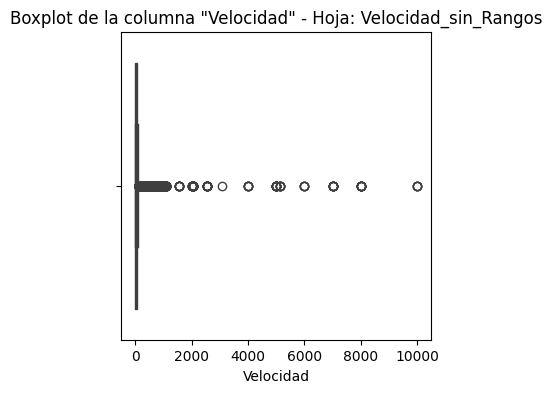

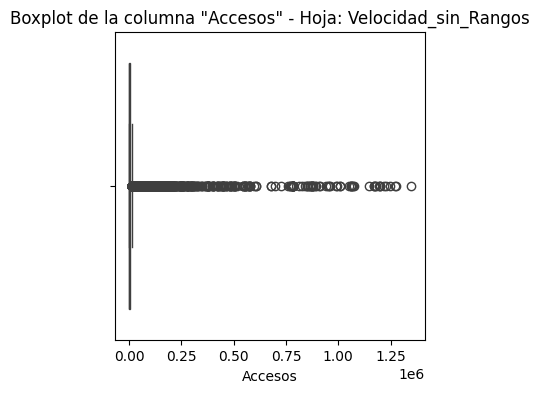

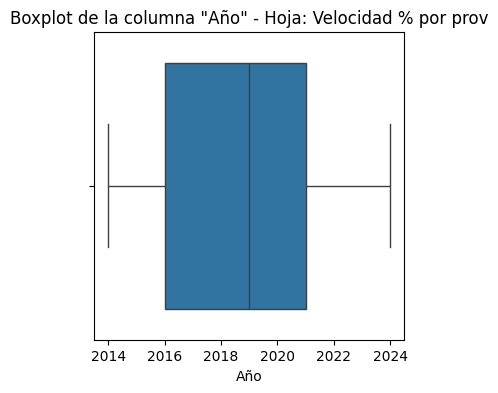

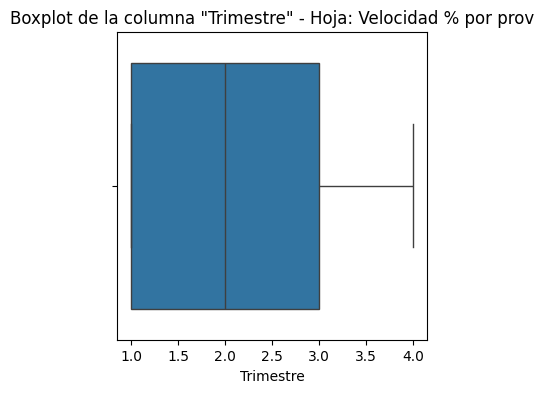

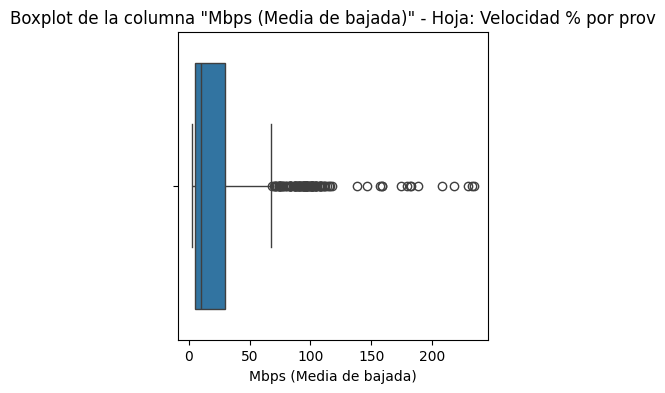

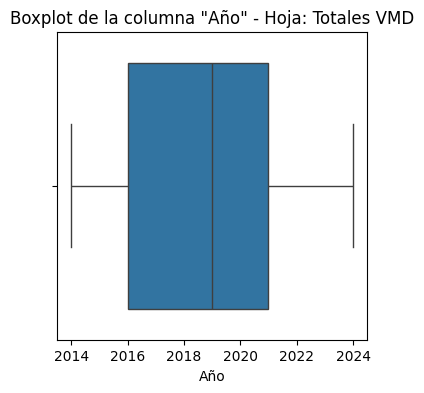

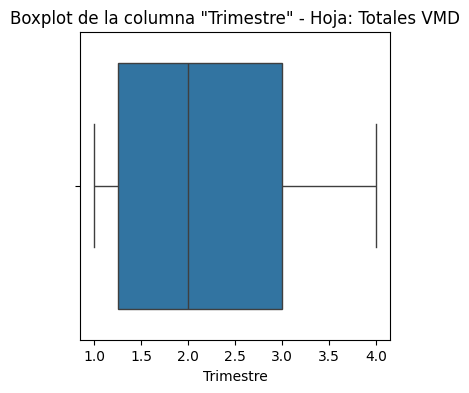

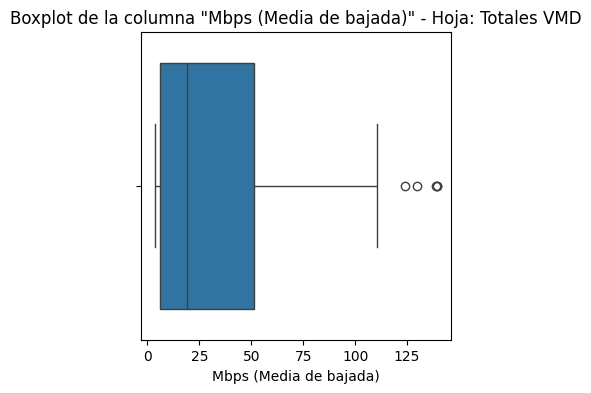

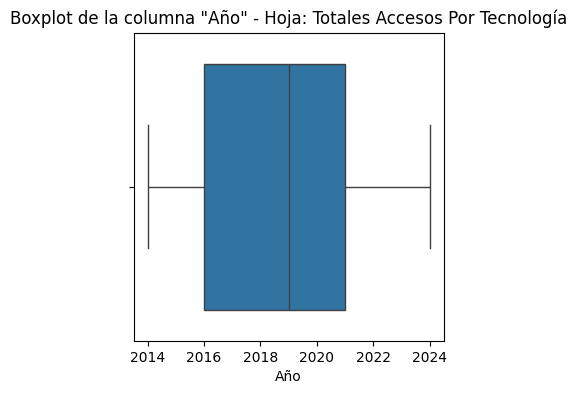

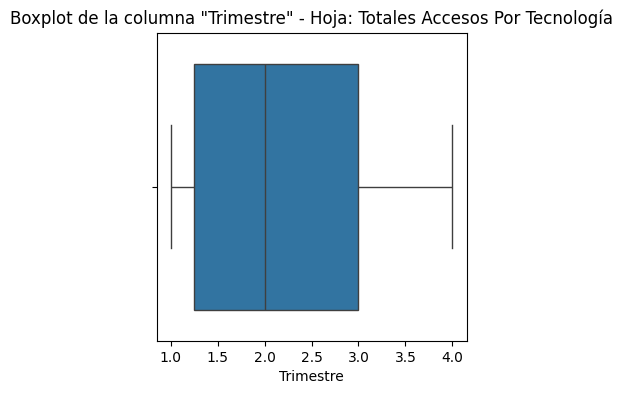

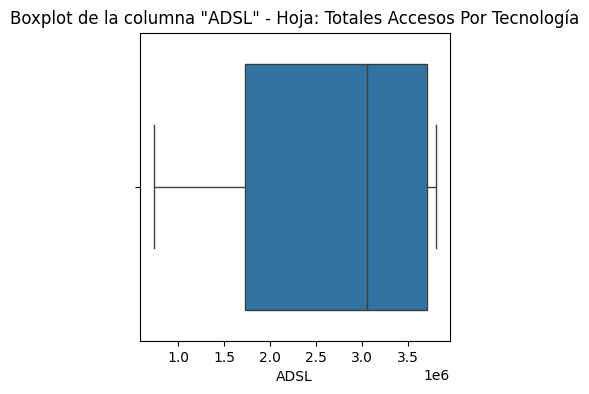

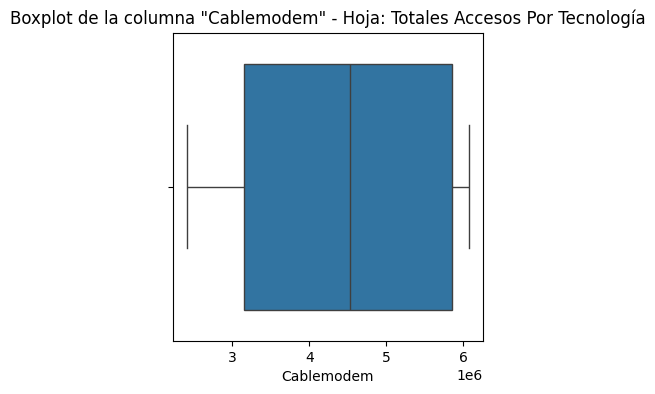

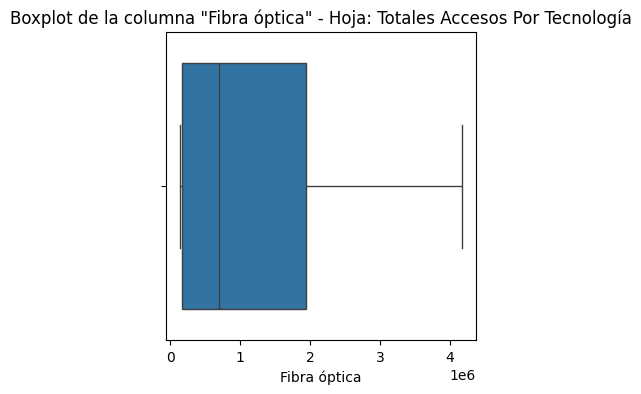

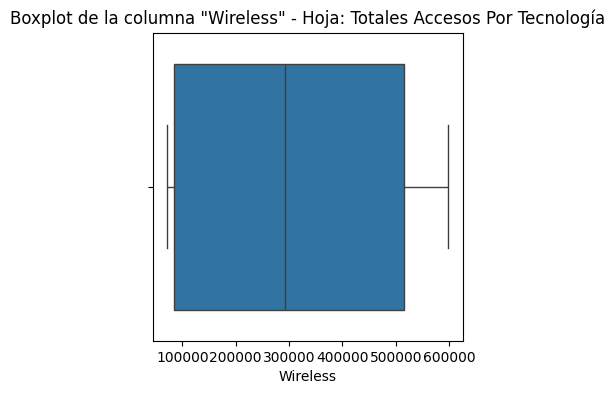

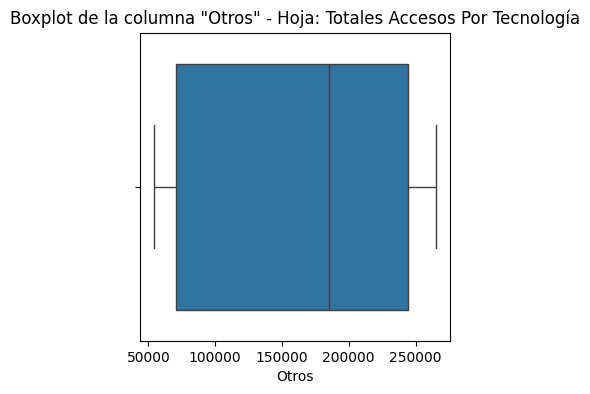

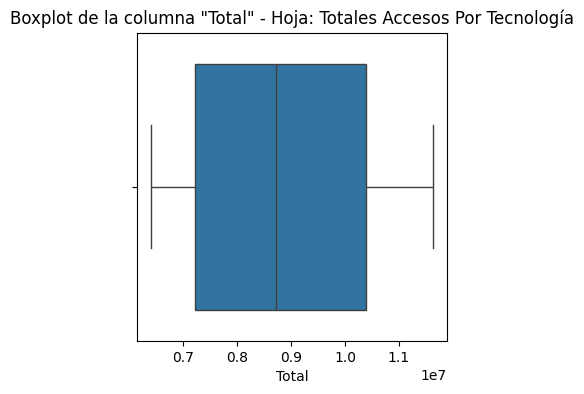

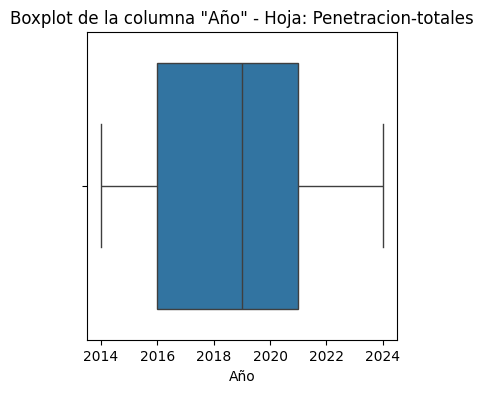

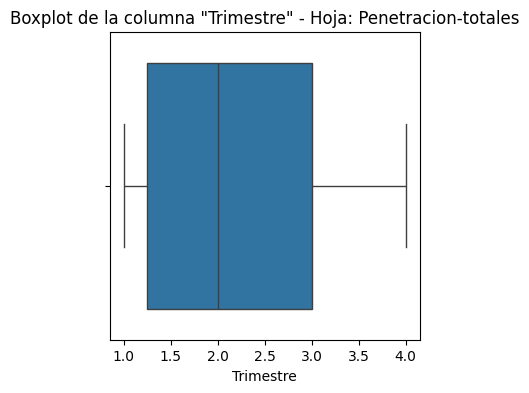

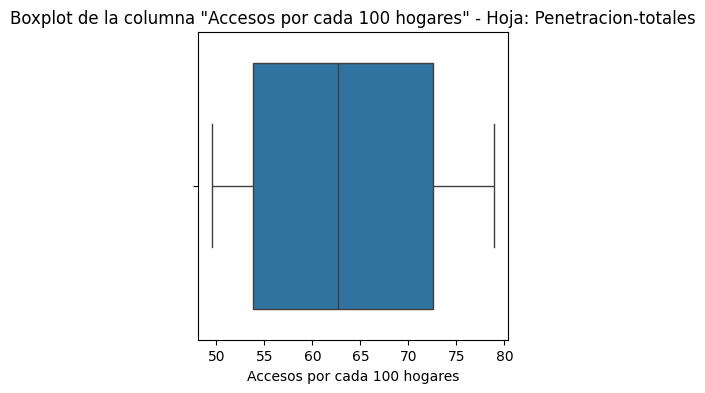

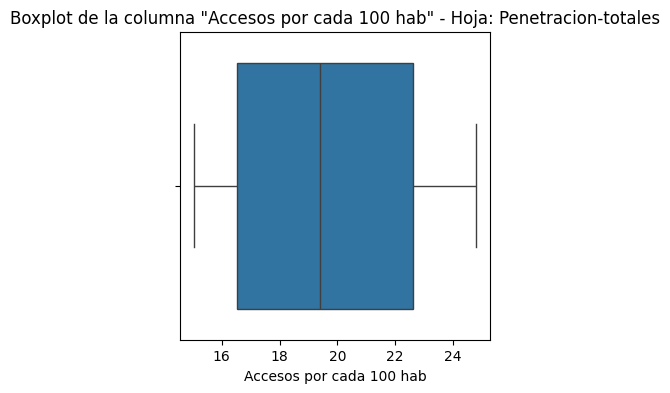

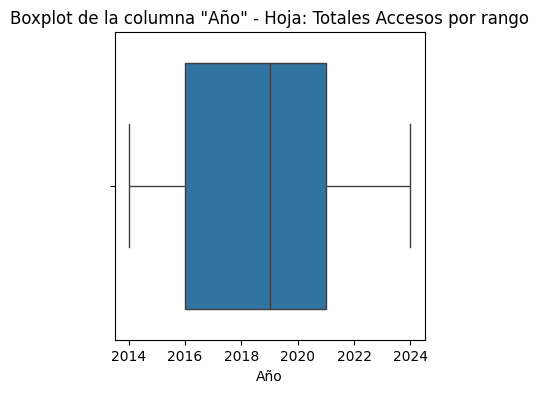

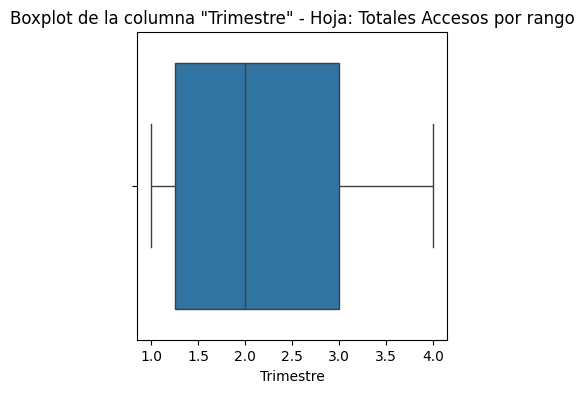

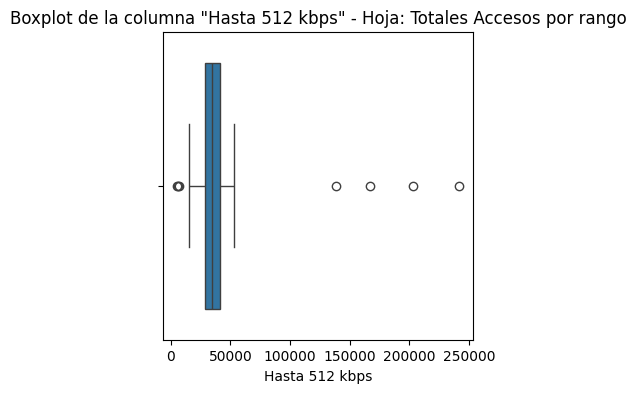

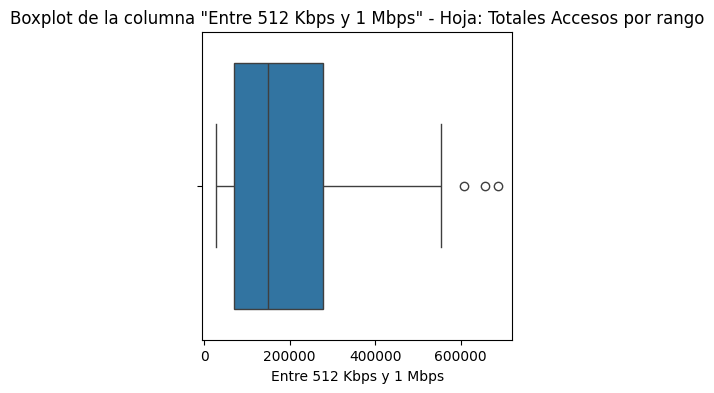

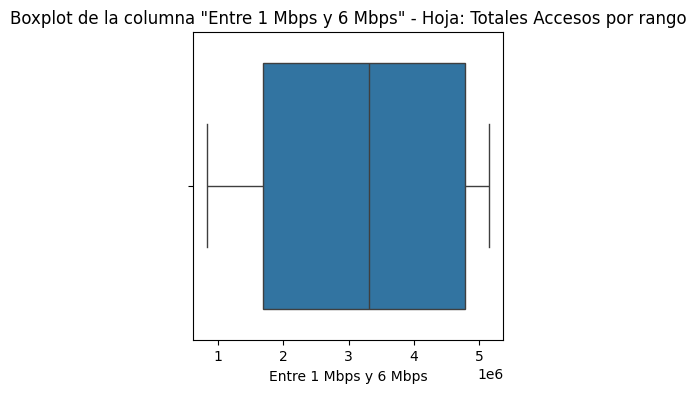

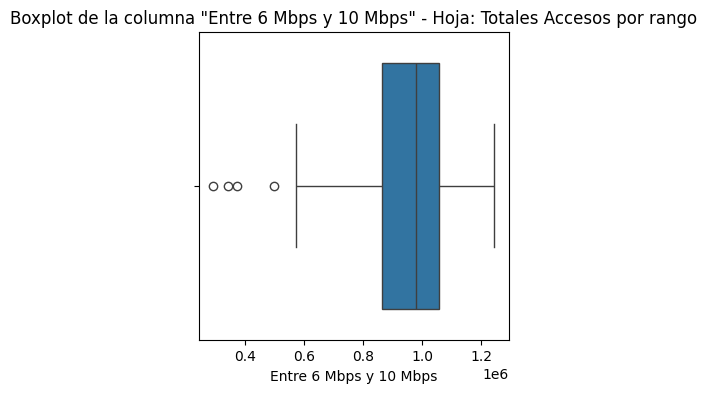

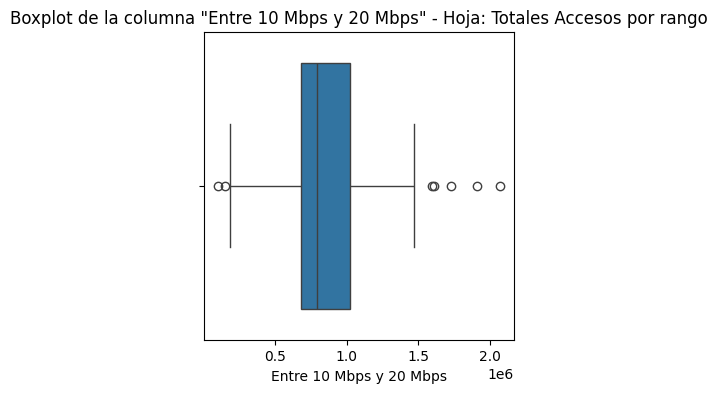

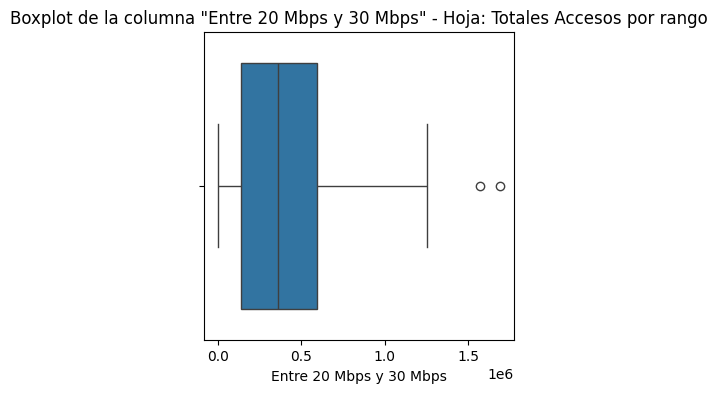

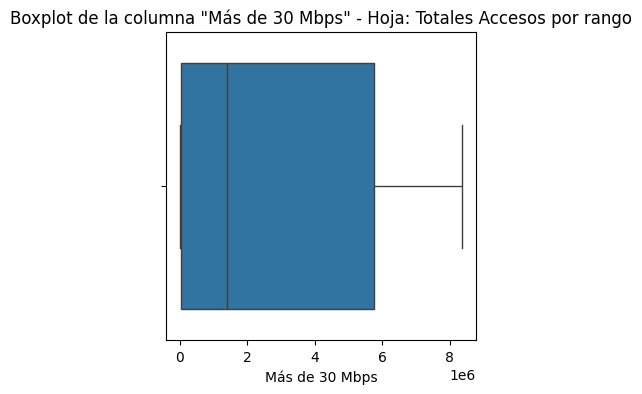

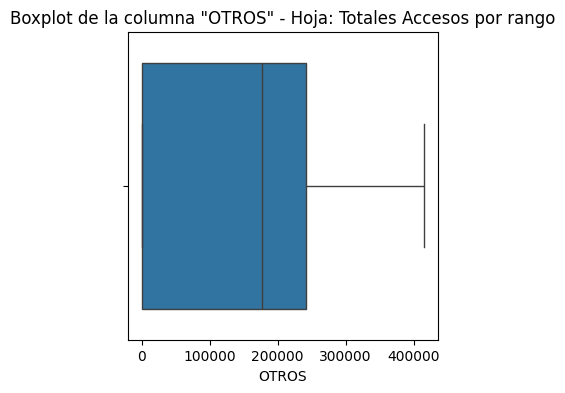

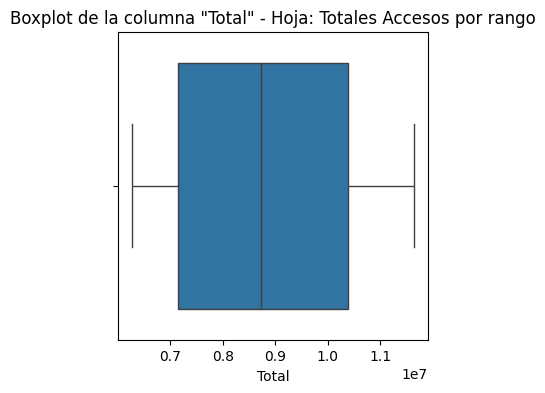

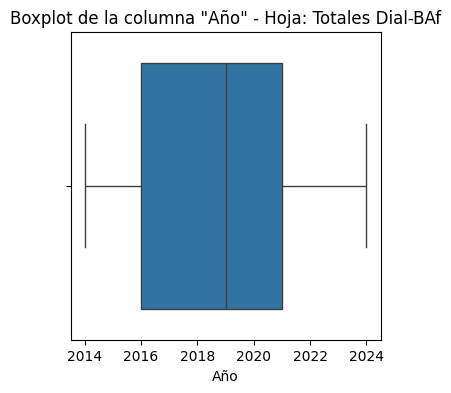

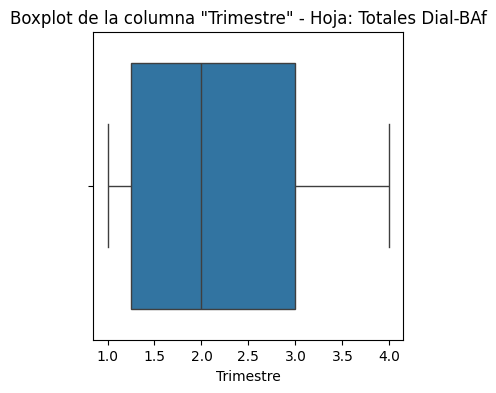

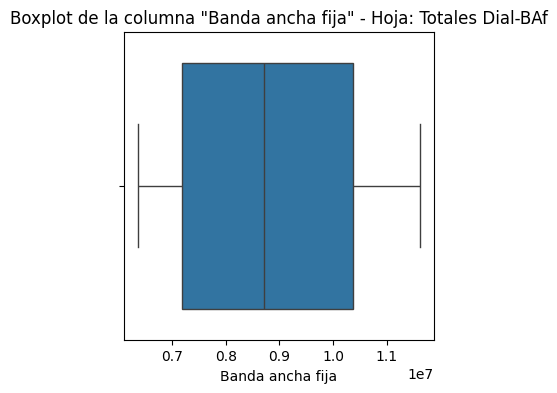

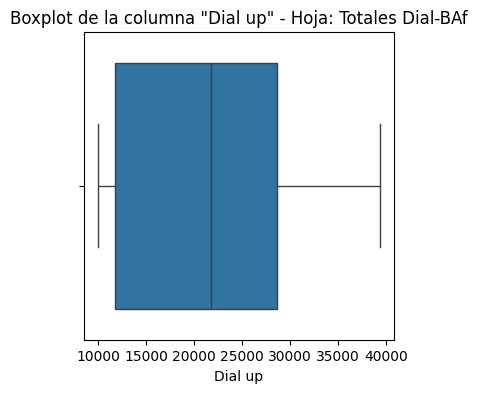

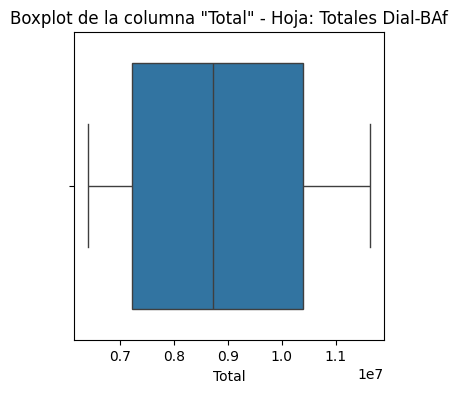

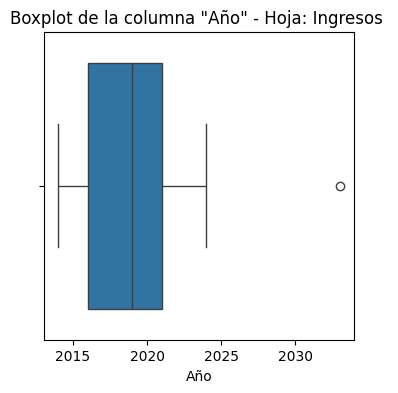

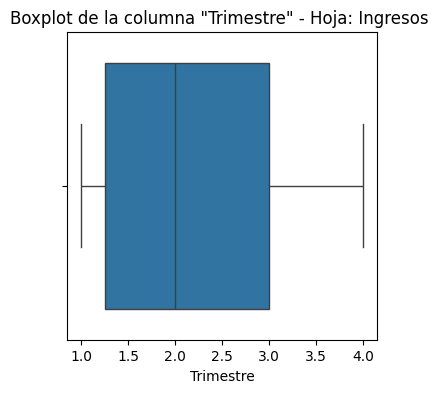

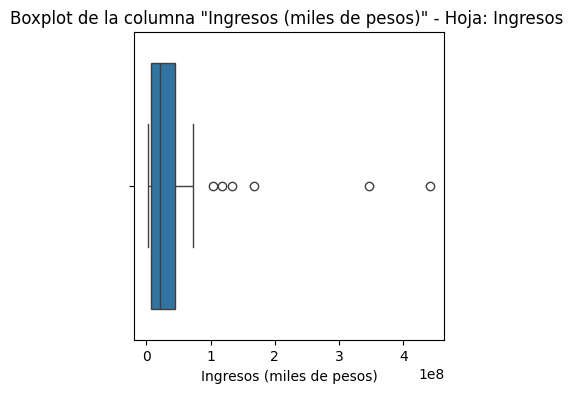

In [18]:
# Función para crear boxplot de outliers por cada hoja
def generar_boxplot(df, nombre_hoja):
    # Filtrar solo las columnas numéricas
    for columna in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(4, 4))
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de la columna "{columna}" - Hoja: {nombre_hoja}')
        plt.show()

# Generar boxplots para cada hoja
for nombre_hoja, df in df_dict.items():
    generar_boxplot(df, nombre_hoja)

In [ ]:
for key, value in df_dict.items():
    print(f"Clave: {key}")
    print("Contenido:")
    print(value) 
    print("-" * 50) 

In [ ]:
accesos_por_tecnologia = df_dict['Accesos Por Tecnología']

print("Tipo de dato antes de la conversión:")
print(accesos_por_tecnologia['Trimestre'].dtype)

# Reemplazar valores no válidos por NaN
accesos_por_tecnologia['Trimestre'] = pd.to_numeric(accesos_por_tecnologia['Trimestre'], errors='coerce')

# Conversión final a int, eliminando filas con NaN si es necesario
accesos_por_tecnologia.dropna(subset=['Trimestre'], inplace=True)
accesos_por_tecnologia['Trimestre'] = accesos_por_tecnologia['Trimestre'].astype(int)

print("\nTipo de dato después de la conversión:")
print(accesos_por_tecnologia['Trimestre'].dtype)
print("\nDataFrame después de la conversión:")
print(accesos_por_tecnologia)

Tipo de dato antes de la conversión:
object

Tipo de dato después de la conversión:
int64

DataFrame después de la conversión:
       Año  Trimestre            Provincia      ADSL  Cablemodem  \
0     2024          2         Buenos Aires  214055.0   2722466.0   
1     2024          2      Capital Federal   54102.0   1144781.0   
2     2024          2            Catamarca    4951.0     10303.0   
3     2024          2                Chaco    9448.0     57935.0   
4     2024          2               Chubut   25955.0     80704.0   
...    ...        ...                  ...       ...         ...   
1003  2014          1             Santa Fe  322662.0    174296.0   
1004  2014          1  Santiago Del Estero   32567.0      3598.0   
1005  2014          1     Tierra Del Fuego   21618.0      2837.0   
1006  2014          1              Tucumán  129717.0        83.0   
1007     0          0                    0       0.0         0.0   

      Fibra óptica  Wireless    Otros      Total  Porcen


Un poco de contexto; 
Como bien sabemos, el objetivo principal de las telecomunicaciones es facilitar la transmisión de información y comunicación a distancia mediante el uso de tecnologías avanzadas,
convirtiendose en un pilar para la modernización, el desarrollo social y económico, y la mejora de la calidad de vida. Es parte de la escencia humana el querer estar conectado y en constante comunicacion con su entorno. 

Antes podiamos observar como la radio, la television y la telefonia fija jugaban un papel importante en nuestra vida cotidiana, pero a medida que el tiempo paso y las tecnologias evolucionaron fue imposible ignorar el impacto que el internet provoco en la cotidianidad, por que si bien en un inicio tenia fines de investigacion cientifica y militar, con el tiempo evolucionó para convertirse en una herramienta global para el comercio, la educación, el entretenimiento y la conexión social.


C:\Users\pc\AppData\Local\Temp\ipykernel_15044\3295188886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_por_año, x='Año', y='Ingresos (miles de pesos)', palette="viridis")


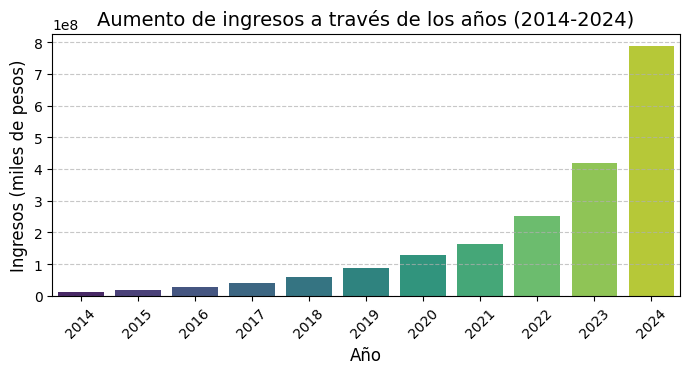

In [ ]:
df_ingresos_internet = df_dict['Ingresos '] #filtramos la hoja de ingresos 
df_ingresos_filtrado = df_ingresos_internet[(df_ingresos_internet['Año'] >= 2014) & (df_ingresos_internet['Año'] <= 2024)] # Filtrar años en el rango 2014-2024
ingresos_por_año = df_ingresos_filtrado.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index() # Agrupar por año y sumar los ingresos

# Crear gráfico de barras
plt.figure(figsize=(7, 4))
sns.barplot(data=ingresos_por_año, x='Año', y='Ingresos (miles de pesos)', palette="viridis")

plt.title("Aumento de ingresos a través de los años (2014-2024)", fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos (miles de pesos)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()


plt.show()

Graficos de barras para observar el comportamiento de los ingresos del servicio de internet en Argentina en un periodo del 2014 al 2024.
Como podemos observar el incremento es exponencial, lo que nos lleva a obviar que en cuestiones de inversion, apuntar al internet es la mejor opcion. 

En telecomunicaciones, Dial-BAf se refiere a la combinación de dos tipos de accesos a Internet:

In [ ]:
campos = ["Trimestre", "Año", "Banda ancha fija", "Dial up"]

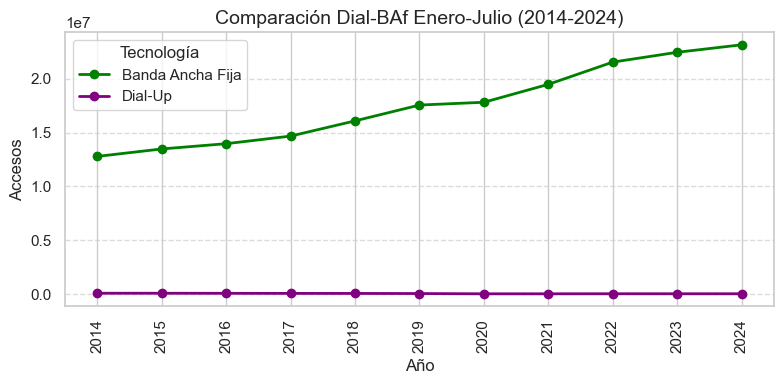

In [ ]:
# Extraer la hoja 'Totales Dial-BAf'
df_dial_baf = df_dict['Totales Dial-BAf']


df_filtrado = df_dial_baf[df_dial_baf["Trimestre"].isin([1, 2])]   # Filtrar los datos para los dos primeros trimestres
df_agrupado = df_filtrado.groupby("Año")[["Banda ancha fija", "Dial up"]].sum().reset_index() # Agrupar los datos por año y sumar los accesos para Banda Ancha Fija y Dial-Up

plt.figure(figsize=(8, 4)) # Configuración del gráfico de dispersión con líneas
plt.plot(df_agrupado["Año"], df_agrupado["Banda ancha fija"], color="green", marker="o", label="Banda Ancha Fija", linewidth=2) # Graficar Banda Ancha Fija con líneas y puntos
plt.plot(df_agrupado["Año"], df_agrupado["Dial up"], color="purple", marker="o", label="Dial-Up", linewidth=2) # Graficar Dial-Up con líneas y puntos

plt.title("Comparación Dial-BAf Enero-Julio (2014-2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Accesos", fontsize=12)
plt.xticks(df_agrupado["Año"], rotation=90)
plt.legend(title="Tecnología", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

Gráfico de lineas que comprende el periodo de enero a julio de los años 2014 al 2024. Donde comparamos los accesos de la poblacion Argentina.

-Banda Ancha Fija (BAf): que hace referencia a los servicios de Internet de alta velocidad que utilizan tecnologías como ADSL, fibra óptica o cable coaxial para conectar a los usuarios a la red.
-Dial-Up: que es un tipo de conexión a Internet realizado a través de una línea telefónica conmutada. Este último es un método de conexión más antiguo y de baja velocidad, que utiliza un módem telefónico para conectar un dispositivo a la red. 

Siendo clara la tendencia, en este analisis nos enfocaremos a las tecnologias de Banda ancha fija. 

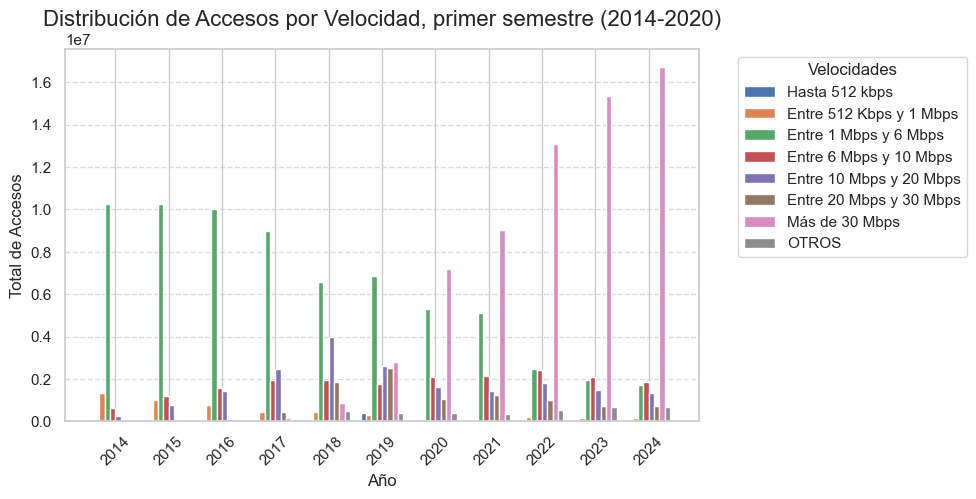

In [341]:
df_rangos = df_dict['Totales Accesos por rango']
df_filtrado = df_rangos[df_rangos["Trimestre"].isin([1, 2])]  # Filtrar los datos para los primeros dos trimestres

# Agrupar por año y sumar los accesos por rango de velocidad
rangos_velocidad = [
    'Hasta 512 kbps',
    'Entre 512 Kbps y 1 Mbps',
    'Entre 1 Mbps y 6 Mbps',
    'Entre 6 Mbps y 10 Mbps',
    'Entre 10 Mbps y 20 Mbps',
    'Entre 20 Mbps y 30 Mbps',
    'Más de 30 Mbps',
    'OTROS'
]
df_agrupado = df_filtrado.groupby("Año")[rangos_velocidad].sum().reset_index()

# Configuración del gráfico de barras agrupadas
plt.figure(figsize=(10, 5))

x = np.arange(len(df_agrupado["Año"]))  # Posiciones para las barras en el eje X
width = 0.1  # Ancho de cada barra

# Crear barras para cada rango de velocidad
for i, rango in enumerate(rangos_velocidad):
    plt.bar(x + i * width, df_agrupado[rango], width, label=rango)

plt.title("Distribución de Accesos por Velocidad, primer semestre (2014-2020)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Total de Accesos", fontsize=12)
plt.xticks(x + (len(rangos_velocidad) - 1) * width / 2, df_agrupado["Año"], rotation=45)  
plt.legend(title="Velocidades", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

 Gráfico de barras, que presenta la distribución de accesos por velocidad de conexión, tomando el primer semestre de cada año respectivamente.
 
Hablando de velocidad, este grafico muestra la clasificación de las conexiones a internet según la velocidad de descarga, expresada en Mbps. 
En este se puede observar cómo anteriormente la velocidad que predominaba era entre 1 y 6 Mbps, y cómo con el tiempo, especialmente en el año 2020 (época de pandemia), esta incrementó a más de 30 Mbps. Esto puede asociarse a que, antes, los archivos no eran tan pesados, mientras que después de la pandemia el mundo de la comunicación se vio obligado a depender totalmente de internet. 

El intercambio de información comenzó a realizarse en formatos más pesados, como reuniones virtuales, videollamadas y bases de datos más grandes con redes sociales. Generando asi la necesidad de buscar las mejores tecnologias que optimicen esta velocidad. 

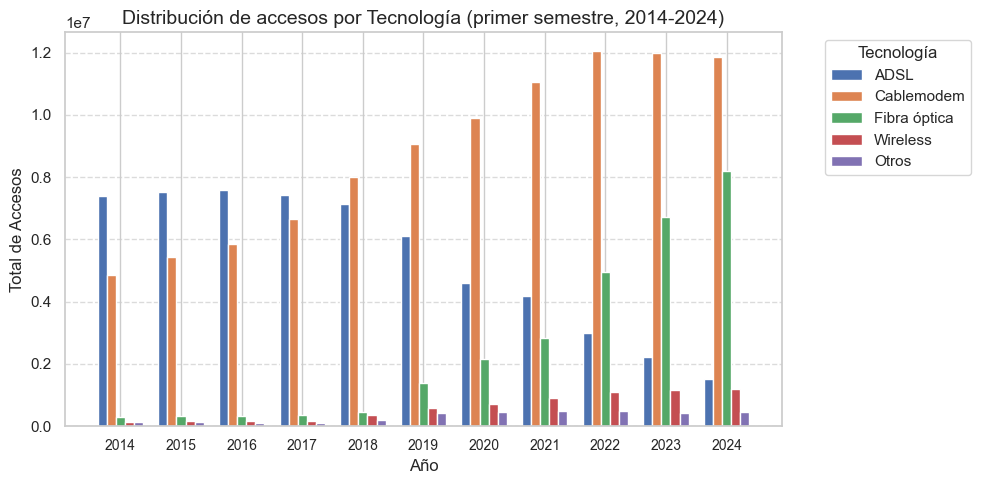

In [ ]:
# Extraer la hoja 'Totales Accesos Por Tecnología'
df_tecnologia = df_dict['Totales Accesos Por Tecnología']


df_filtrado = df_tecnologia[df_tecnologia["Trimestre"].isin([1, 2])]  # Filtrar los datos para los primeros dos trimestres
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'] # Agrupar por año y sumar los accesos por tecnología
df_agrupado = df_filtrado.groupby("Año")[tecnologias].sum().reset_index()

# Configuración del gráfico de barras agrupadas
ancho_barra = 0.15  
años = df_agrupado["Año"]  
x = np.arange(len(años)) 

# Crear el gráfico
plt.figure(figsize=(10, 5))
for i, tecnologia in enumerate(tecnologias):
    plt.bar(x + i * ancho_barra, df_agrupado[tecnologia], width=ancho_barra, label=tecnologia)

plt.title("Distribución de accesos por Tecnología (primer semestre, 2014-2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Total de Accesos", fontsize=12)
plt.xticks(x + ancho_barra * (len(tecnologias) - 1) / 2, años, fontsize=10)  
plt.legend(title="Tecnología", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

Gráfico de barras que representa la evolución de los accesos por tipo de tecnología (2014-2020), Trimestres 1 y 2.

Dentro de las tecnologias de BAf, observamos que el cablemódem y la fibra óptica toman protagonismo, debido a su alta velocidad de subida y bajada, en comparación con las demás tecnologías.
Por lo que nos enfocaremos en estas dos para ver mas a profundidad las posibles areas de oportunidad y evaluar como estas se adaptan a las crecientes demandas del mercado.

Pero antes de profundizar en estos temas, un poco de contexto geografico. 


In [97]:
accesos_por_tecnologia = df_dict['Accesos Por Tecnología']
accesos_por_tecnologia.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total', 'Porcentaje_Fibra',
       'Crecimiento ADSL (%)', '% Fibra Óptica'],
      dtype='object')

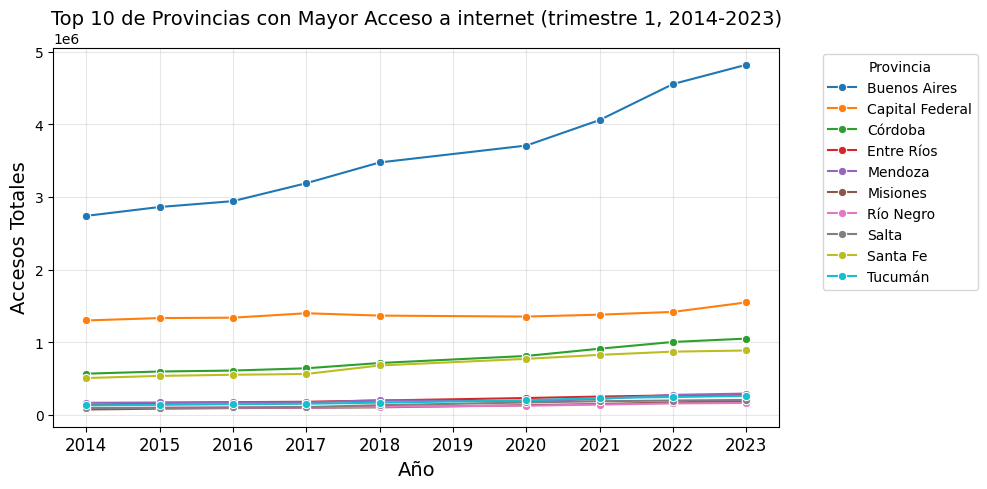

In [98]:
# Filtrar los datos para el primer trimestre de 2014 a 2023
df_filtrado = accesos_por_tecnologia[
    (accesos_por_tecnologia['Año'].isin(range(2014, 2024))) &  # De 2014 a 2023
    (accesos_por_tecnologia['Trimestre'] == 1)
]

# Agrupar por provincia y año para sumar los accesos totales
df_resumen = df_filtrado.groupby(['Provincia', 'Año'])['Total'].sum().reset_index()

# Filtrar las 10 provincias con el mayor número de accesos totales
top_10_provincias = df_resumen.groupby('Provincia')['Total'].sum().nlargest(10).index
df_resumen_top_10 = df_resumen[df_resumen['Provincia'].isin(top_10_provincias)]

# Configurar los datos para el gráfico de líneas
df_long = df_resumen_top_10.copy()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_long,
    x='Año', y='Total',
    hue='Provincia', marker='o', palette='tab10'
)

plt.title('Top 10 de Provincias con Mayor Acceso a internet (trimestre 1, 2014-2023)', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Accesos Totales', fontsize=14)
plt.xticks(range(2014, 2024), fontsize=12)  # Ahora se incluyen los años de 2014 a 2023
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Grafico de lineas multiples para observar como han incrementado los accesos por provincia, durante el primer trimestre (2014-2024).

Notamos un incremento en los accesos a internet conforme el paso del tiempo, especialmente en la provincia de Buenos Aires, lo cual se puede atribuir a una mayor densidad poblacional.
Pero para ser mas especificos, realizaremos un top 5 de provincias con mejor porcentaje de acceso a internet, correspondiente a conexiones de fibra optica y cablemodem. 

Primero filtraremos los datos para observar el porcentaje de accesos por "Fibra óptica" respecto al total por provincia, posteriormente se agrupan por provincia y se calcula el promedio del porcentaje para asi seleccionar el top 5.

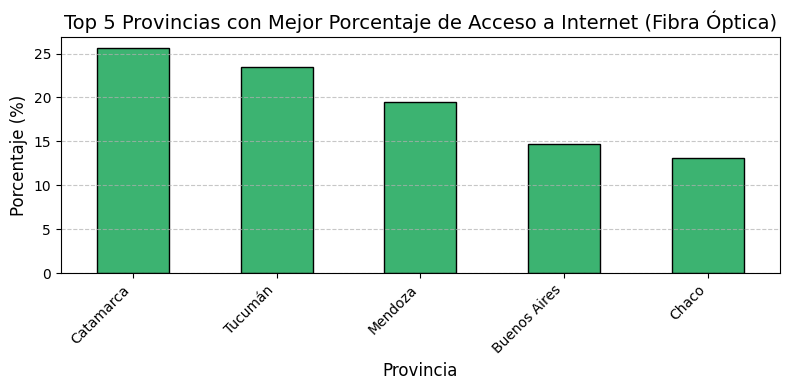

In [99]:
# Calcular el porcentaje de accesos por "Fibra óptica" respecto al total por provincia
accesos_por_tecnologia['Porcentaje_Fibra'] = (accesos_por_tecnologia['Fibra óptica'] / accesos_por_tecnologia['Total']) * 100

# Agrupar por provincia y calcular el promedio del porcentaje
porcentaje_fibra_provincia = accesos_por_tecnologia.groupby('Provincia')['Porcentaje_Fibra'].mean()

# Ordenar y seleccionar el top 5
top_5_provincias_fibra = porcentaje_fibra_provincia.sort_values(ascending=False).head(5)

# Graficar
plt.figure(figsize=(8, 4))
top_5_provincias_fibra.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Top 5 Provincias con Mejor Porcentaje de Acceso a Internet (Fibra Óptica)', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Provincia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Grafico de barras del top 5 de provincias con mayor porcentaje de accesos a internet por Fibra optica. 
Este análisis permite destacar cuáles son las provincias más avanzadas en adopción de fibra óptica como tecnología de acceso a Internet.

Por otro lado tenemos el Cablemodem: 

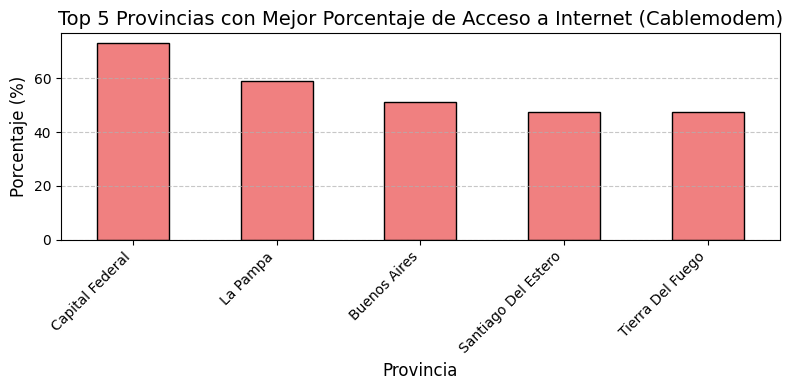

In [100]:
# Calcular el porcentaje de accesos por "Cablemodem" respecto al total por provincia
accesos_por_tecnologia['Porcentaje_Cablemodem'] = (accesos_por_tecnologia['Cablemodem'] / accesos_por_tecnologia['Total']) * 100

# Agrupar por provincia y calcular el promedio del porcentaje
porcentaje_cablemodem_provincia = accesos_por_tecnologia.groupby('Provincia')['Porcentaje_Cablemodem'].mean()

# Ordenar y seleccionar el top 5
top_5_provincias = porcentaje_cablemodem_provincia.sort_values(ascending=False).head(5)

# Graficar
plt.figure(figsize=(8, 4))
top_5_provincias.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 5 Provincias con Mejor Porcentaje de Acceso a Internet (Cablemodem)', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Provincia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Grafico de barras del top 5 de provincias con mayor porcentaje de accesos a internet por Cablemodem.
Como se puede observar, los lugares de mayor densidad poblacional tienen un mayor porcentaje de accesos a internet por Cablemodem, posiblemente ligado  al costo y disponibilidad del mismo.

Aunque la fibra óptica ofrece mejor rendimiento, su despliegue es más costoso y no está tan extendido en todas las áreas, por ejemplo en zonas rurales o menos densamente pobladas, es posible que la fibra óptica no esté disponible, lo que limita su acceso.

In [ ]:
#Carga de archivos de tv y telefonia fija
telefonia_fija = pd.ExcelFile(r"documentos excel\telefonia_fija.xlsx")
tv = pd.ExcelFile(r"documentos excel\Television (1).xlsx")

df_penetracion_fija = telefonia_fija.parse('Fija_penetracion_tot')
df_penetracions_tv = tv.parse('Penetracion_totales_TV')
df_penetracion_internet = df_dict ['Penetracion-totales']

Tomaremos en cuenta otras variables haciendo una comparacion con otros medios de comunicacion, como lo son la telefonia fija y la TV. 


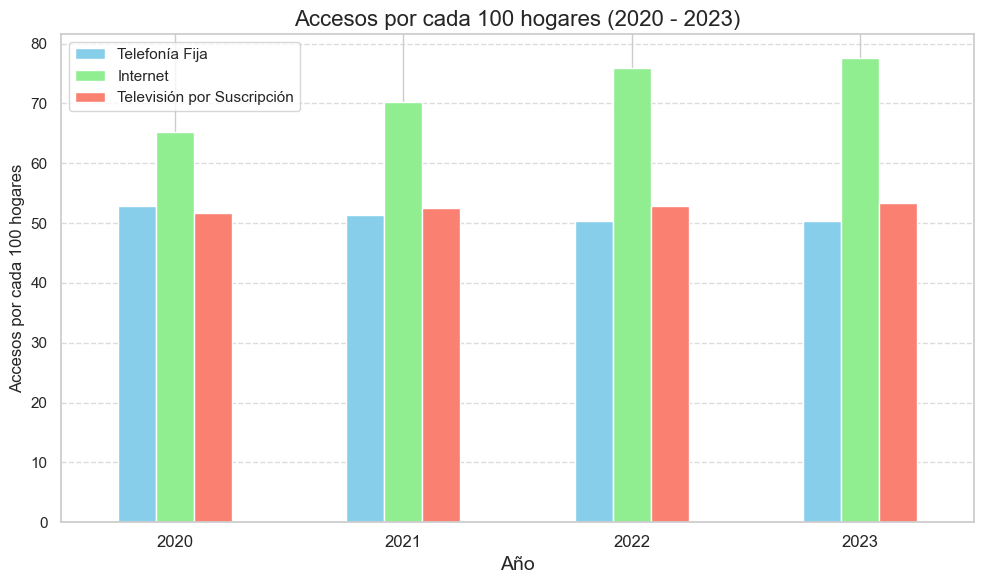

In [406]:
# Filtrar los datos para los años 2020 a 2023
df_penetracion_fija_2020_2023 = df_penetracion_fija[df_penetracion_fija['Año'].isin([2020, 2021, 2022, 2023])]
df_penetracion_internet_2020_2023 = df_penetracion_internet[df_penetracion_internet['Año'].isin([2020, 2021, 2022, 2023])]
df_penetracions_tv_2020_2023 = df_penetracions_tv[df_penetracions_tv['Año'].isin([2020, 2021, 2022, 2023])]

# Obtener los accesos por cada 100 hogares para cada tipo de acceso y cada año
accesos_fija = df_penetracion_fija_2020_2023.groupby('Año')['Accesos telefonía fija por cada 100 hogares'].mean()
accesos_internet = df_penetracion_internet_2020_2023.groupby('Año')['Accesos por cada 100 hogares'].mean()
accesos_tv = df_penetracions_tv_2020_2023.groupby('Año')['Accesos TV por suscripción por cada 100 hogares'].mean()

# Crear un DataFrame para la gráfica
df_accesos_2020_2023 = pd.DataFrame({
    'Año': accesos_fija.index,
    'Telefonía Fija': accesos_fija.values,
    'Internet': accesos_internet.values,
    'Televisión por Suscripción': accesos_tv.values
})

# Crear el gráfico de barras
df_accesos_2020_2023.set_index('Año').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])

# Personalizar el gráfico
plt.title('Accesos por cada 100 hogares (2020 - 2023)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Accesos por cada 100 hogares', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Accesos por cada 100 hogares', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Grafico de barras de accesos a tv, telefonia fija e internet por cada 100 hogares (2020-2023). 

Podemos observar como tienden a aumentar los accesos a internet en cada año, especialmente despues de pandemia (2020) que tuvo un importante impacto en la demanda de estos servicios. Asi mismo, es muy notorio como la telefonia fija de a poco pierde relevancia comparado con la tv por suscripcion, pero probablemente este ultimo servicio continua su modesto incremento por estar ligado a servicios de internet por cablemodem, ya que al compartir infraestructura mantiene vigente a la tv por suscripcion. 

KPI´S.
Comenzaremos a desarrollar los KPI´s que son indicadores clave de desempeño, utilizados para medir el progreso y el éxito en áreas clave. 



KPI 1: En este caso iniciaremos con el KPI propuesto que consiste en Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [5]:
# Crear una copia del DataFrame original para no modificarlo directamente
df_penetracion_totales = df_dict['Penetracion-totales']
df_penetracion_kpi = df_penetracion_totales.copy()

df_penetracion_kpi['Nuevo acceso'] = df_penetracion_kpi['Accesos por cada 100 hogares'] * 1.02
df_penetracion_kpi['KPI (%)'] = ((df_penetracion_kpi['Nuevo acceso'] - df_penetracion_kpi['Accesos por cada 100 hogares']) / 
                                  df_penetracion_kpi['Accesos por cada 100 hogares']) * 100

print(df_penetracion_kpi[['Año', 'Trimestre', 'Accesos por cada 100 hogares', 'Nuevo acceso', 'KPI (%)']])

NameError: name 'df_dict' is not defined

KPI 2 
Participación de Fibra Óptica en el mercado total de accesos. 
Objetivo: cuantificar qué porcentaje de los accesos totales en un país utiliza la tecnología de Fibra Óptica, en comparación con otras tecnologías 
Formula: participacion de fibra optica (%) = (total de accesos con Fibra optica en el pais/total de accesos de todas las tecnologias en el pais) x 100

In [ ]:
# Sumar los accesos con Fibra Óptica y el total general
total_fibra = accesos_por_tecnologia['Fibra óptica'].sum()
total_accesos = accesos_por_tecnologia['Total'].sum()

# Calcular la participación de Fibra Óptica
participacion_fibra = (total_fibra / total_accesos) * 100
print(f"Participación nacional de Fibra Óptica: {participacion_fibra:.2f}%")

Participación nacional de Fibra Óptica: 13.39%


Para dimensionar mejor el resultado realizaremos un grafico de pastel para mostrar cómo se distribuyen las diferentes tecnologías en el total de accesos.

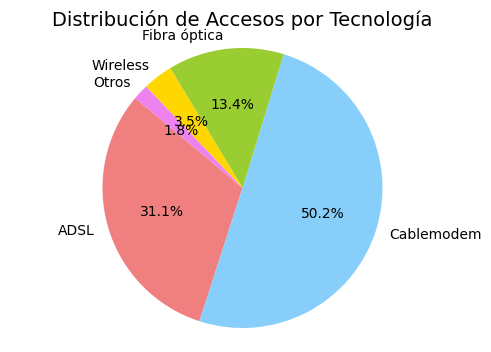

In [32]:
# Cálculo de totales por tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
totales_tecnologias = accesos_por_tecnologia[tecnologias].sum()

# Crear la gráfica de pastel
plt.figure(figsize=(6, 4))
plt.pie(
    totales_tecnologias,
    labels=tecnologias,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightcoral', 'lightskyblue', 'yellowgreen', 'gold', 'violet']
)
plt.title('Distribución de Accesos por Tecnología', fontsize=14)
plt.axis('equal')  
plt.show()

Como podemos observar el ADSL y Cablemodem, aún dominan el mercadopor lo que aun hay espacio para el crecimiento de la fibra óptica. Por lo que se propone: 

1. Planeación estratégica: Identificar regiones con baja participación para priorizar inversiones en despliegue de fibra óptica.
2. Monitoreo de crecimiento: Verificar cómo evoluciona este indicador a lo largo del tiempo y evaluar el impacto de políticas públicas o campañas comerciales.

KPI 3 
Relación de crecimiento trimestral (%) de Cablemodem frente a otras tecnologías.
objetivo: Identifica si el crecimiento de Cablemodem es superior o si está siendo superado por otras tecnologías.
Formula: Accesos cablemodem actual - accesos Cablemodem anterior / accesos cablemodem anterior x 100

In [1]:

totales_accesos_tecnologia = df_dict ['Totales Accesos Por Tecnología'] # DataFrame de accesos por tecnología
totales_accesos_tecnologia = totales_accesos_tecnologia.sort_values(by=['Año', 'Trimestre'])

# Calcular el crecimiento trimestral para Cablemodem
totales_accesos_tecnologia['Crecimiento_Cablemodem'] = (totales_accesos_tecnologia['Cablemodem'].pct_change()) * 100

print(totales_accesos_tecnologia[['Año', 'Trimestre', 'Crecimiento_Cablemodem']])

NameError: name 'df_dict' is not defined

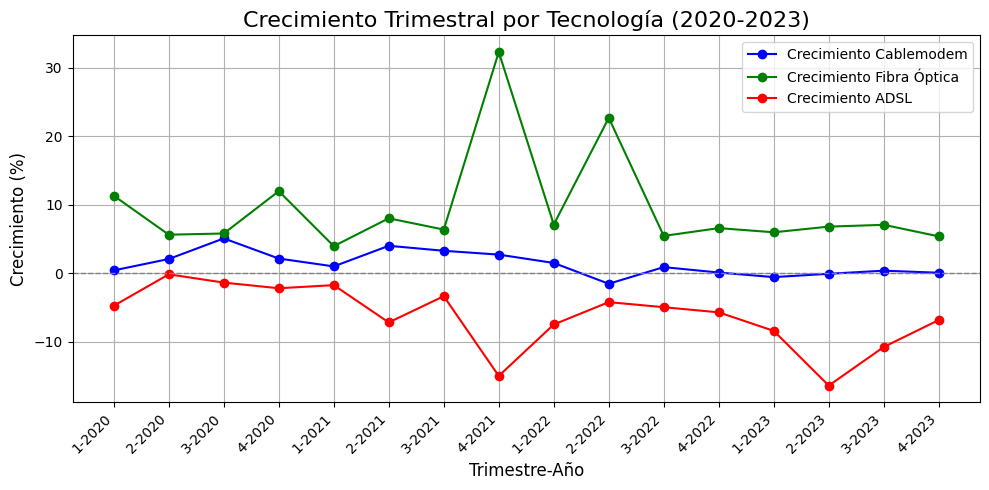

In [85]:
# Ordenar por Año y Trimestre
totales_accesos_tecnologia = totales_accesos_tecnologia.sort_values(by=['Año', 'Trimestre'])

# Calcular crecimiento trimestral para cada tecnología
for tech in ['Cablemodem', 'Fibra óptica', 'ADSL']:
    totales_accesos_tecnologia[f'Crecimiento_{tech}'] = (
        totales_accesos_tecnologia[tech].pct_change() * 100
    )

# Calcular las relaciones de crecimiento
totales_accesos_tecnologia['Rel_Cablemodem_Fibra'] = (
    totales_accesos_tecnologia['Crecimiento_Cablemodem'] / totales_accesos_tecnologia['Crecimiento_Fibra óptica']
)
totales_accesos_tecnologia['Rel_Cablemodem_ADSL'] = (
    totales_accesos_tecnologia['Crecimiento_Cablemodem'] / totales_accesos_tecnologia['Crecimiento_ADSL']
)

# Filtrar datos del 2020 al 2023
totales_accesos_tecnologia = totales_accesos_tecnologia[
    (totales_accesos_tecnologia['Año'] >= 2020) & (totales_accesos_tecnologia['Año'] <= 2023)
]

# Gráfico de comparación de crecimiento trimestral
plt.figure(figsize=(10, 5))

# Cablemodem
plt.plot(
    totales_accesos_tecnologia['Trimestre'].astype(str) + '-' + totales_accesos_tecnologia['Año'].astype(str),
    totales_accesos_tecnologia['Crecimiento_Cablemodem'],
    marker='o', label='Crecimiento Cablemodem', color='blue'
)

# Fibra Óptica
plt.plot(
    totales_accesos_tecnologia['Trimestre'].astype(str) + '-' + totales_accesos_tecnologia['Año'].astype(str),
    totales_accesos_tecnologia['Crecimiento_Fibra óptica'],
    marker='o', label='Crecimiento Fibra Óptica', color='green'
)

# ADSL
plt.plot(
    totales_accesos_tecnologia['Trimestre'].astype(str) + '-' + totales_accesos_tecnologia['Año'].astype(str),
    totales_accesos_tecnologia['Crecimiento_ADSL'],
    marker='o', label='Crecimiento ADSL', color='red'
)

# Configuración del gráfico
plt.title('Crecimiento Trimestral por Tecnología (2020-2023)', fontsize=16)
plt.xlabel('Trimestre-Año', fontsize=12)
plt.ylabel('Crecimiento (%)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid()

plt.tight_layout()
plt.show()

Si bien el cablemodem aun domina como medio principal de acceso a internet, pierde en cuanto a relación de crecimiento trimestral frente a la fibra optica. lo que nos lleva a entender la importancia de priorizar la migracion a infraestructura para fibra optica por su creciente demanda en el mercado. 

In [119]:
accesos_por_tecnologia = df_dict['Accesos Por Tecnología']
accesos_por_tecnologia.to_csv('accesos_por_tecnologia.csv', index=False)

df_penetracion_totales = df_dict['Penetracion-totales']
df_penetracion_totales.to_csv('penetracion_totales.csv', index=False)

totales_accesos_tecnologia = df_dict ['Totales Accesos Por Tecnología']
totales_accesos_tecnologia.to_csv('totales_accesos_tecnologia.csv', index=False)


df_rangos = df_dict['Totales Accesos por rango']
df_rangos.to_csv('totales_accesos_rangos.csv', index=False)


df_dial_baf = df_dict['Totales Dial-BAf']
df_dial_baf.to_csv('totales_dial_baf.csv', index=False)


df_ingresos_internet = df_dict['Ingresos ']
df_ingresos_internet.to_csv('ingresos_internet.csv', index=False)


df_vel_porcent_provincia =  df_dict ["Velocidad % por prov"]
df_vel_porcent_provincia.to_csv('vel_porcent_provincia.csv', index=False)
